reference links:
https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step

http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/

https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.text.html

https://python-graph-gallery.com/10-barplot-with-number-of-observation/

https://towardsdatascience.com/mastering-the-bar-plot-in-python-4c987b459053

In [255]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.dates as dates
import numpy as np
import matplotlib

In [41]:
data = pd.read_csv("/home/ayaz/Desktop/xml2csv.csv")
data

,nct_id,overall_status,start_date,completion_date,condition,Study design info,eligibility,has_expanded_access,enrollment
0,NCT04453566,Recruiting,"May 27, 2020",December 2020,"COVID-19,Life Satisfaction,Anxiety,Mental Heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0
1,NCT04403386,Recruiting,"June 1, 2020","May 31, 2022",COVID-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0
2,NCT04526977,Not yet recruiting,"September 1, 2020","September 30, 2021","Covid19,Immune Suppression,HIV-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0
3,NCT04561102,Enrolling by invitation,"September 11, 2020","December 31, 2020",SARS-CoV-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0
4,NCT04375735,Not yet recruiting,"July 1, 2020","July 1, 2021","ARDS, Human,COVID-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0
...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,"May 13, 2020","August 4, 2020",Well Aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0
3524,NCT04352634,Recruiting,"April 26, 2020","December 31, 2021","Covid-19,Mental Health Disorder,Stress Disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0
3525,NCT04356144,Recruiting,"April 15, 2020","December 1, 2020","Disseminated Intravascular Coagulation,Critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0
3526,NCT04429763,Not yet recruiting,July 2020,November 2020,COVID-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0


In [49]:
data["start_date"] = pd.to_datetime(data["start_date"])

In [50]:
data["completion_date"]=pd.to_datetime(data["completion_date"])

In [56]:
min(data["start_date"])

Timestamp('1998-01-01 00:00:00')

In [70]:
data2=data[(data["start_date"] > "2020-01-01") & (data["start_date"] < '2020-12-31')]

In [172]:
data2['month'] = pd.DatetimeIndex(data2['start_date']).month
data2

/home/ayaz/Desktop/Applied Informatics/numpypandas/npenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nct_id,overall_status,start_date,completion_date,condition,Study design info,eligibility,has_expanded_access,enrollment,month
0,NCT04453566,Recruiting,2020-05-27,2020-12-01,"COVID-19,Life Satisfaction,Anxiety,Mental Heal...","Other,Retrospective","sampling_method:Probability Sample,gender:All,...",No,120.0,5
1,NCT04403386,Recruiting,2020-06-01,2022-05-31,COVID-19,"Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,200.0,6
2,NCT04526977,Not yet recruiting,2020-09-01,2021-09-30,"Covid19,Immune Suppression,HIV-1-infection","Case-Control,Cross-Sectional","sampling_method:Non-Probability Sample,gender:...",No,90.0,9
3,NCT04561102,Enrolling by invitation,2020-09-11,2020-12-31,SARS-CoV-2,"Case-Only,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2500.0,9
4,NCT04375735,Not yet recruiting,2020-07-01,2021-07-01,"ARDS, Human,COVID-19","Randomized,Parallel Assignment,Patients will b...","gender:All,Min Age:18 Years,Max Age:N/A",No,20.0,7
...,...,...,...,...,...,...,...,...,...,...
3523,NCT04378803,Completed,2020-05-13,2020-08-04,Well Aging,"Randomized,Crossover Assignment,The wait-list ...","gender:All,Min Age:60 Years,Max Age:95 Years",No,53.0,5
3524,NCT04352634,Recruiting,2020-04-26,2021-12-31,"Covid-19,Mental Health Disorder,Stress Disorde...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,2000.0,4
3525,NCT04356144,Recruiting,2020-04-15,2020-12-01,"Disseminated Intravascular Coagulation,Critica...","Cohort,Prospective","sampling_method:Non-Probability Sample,gender:...",No,60.0,4
3526,NCT04429763,Not yet recruiting,2020-07-01,2020-11-01,COVID-19,"Randomized,Parallel Assignment,It will be incl...","gender:All,Min Age:18 Years,Max Age:79 Years",No,30.0,7


In [167]:
min(data2["month"])

1

In [278]:
trial_count=data2["month"][( data2["start_date"] <'2020-12-31')
                           & ( data2["start_date"] > '2020-01-01' )
                          ].value_counts()
#x=trial_count.keys()
#y=trial_count.values()
# for i in range(len(trial_count)):
#     l1.append(trial_count.iloc[i])
#l1.sort()
t2=trial_count.sort_index()
t2

1      21
2      78
3     355
4     807
5     617
6     466
7     353
8     251
9     305
10    127
11     38
12     24
Name: month, dtype: int64

In [293]:
width = 0.35
#rects1 = ax.bar(x - width/2, t2 , width, label='count')

months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']

In [302]:
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height + 10),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# def autolabel(rects, xpos='center'):
#     """
#     Attach a text label above each bar in *rects*, displaying its height.

#     *xpos* indicates which side to place the text w.r.t. the center of
#     the bar. It can be one of the following {'center', 'right', 'left'}.
#     """

#     xpos = xpos.lower()  # normalize the case of the parameter
#     ha = {'center': 'center', 'right': 'left', 'left': 'right'}
#     offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

#     for rect in rects:
#         height = rect.get_height()
#         ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
#                 '{}'.format(height), ha=ha[xpos], va='bottom')



# def autolabel(rects, ax):
#     # Get y-axis height to calculate label position from.
#     (y_bottom, y_top) = ax.get_ylim()
#     y_height = y_top - y_bottom

#     for rect in rects:
#         height = rect.get_height()

#         # Fraction of axis height taken up by this rectangle
#         p_height = (height / y_height)

#         # If we can fit the label above the column, do that;
#         # otherwise, put it inside the column.
#         if p_height > 0.95: # arbitrary; 95% looked good to me.
#             label_position = height - (y_height * 0.05)
#         else:
#             label_position = height + (y_height * 0.01)

#         ax.text(rect.get_x() + rect.get_width()/2., label_position,
#                 '%d' % int(height),
#                 ha='center', va='bottom')

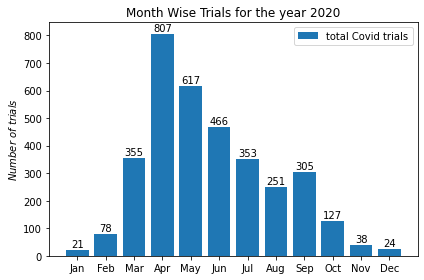

In [347]:
x=t2.index
y=t2
fig , ax = plt.subplots()

ax.bar(t2.index,t2)

ax.set_title("Month Wise Trials for the year 2020")
ax.set_ylabel('$Number$ $of$ $trials$')
#ax.set_xlabel('$Months$')
ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(months)
#ax.legend(loc='upper right')
ax.legend(labels=["total Covid trials"])

for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    #ax.bar(x_, y_)
    
     # add some text
    ax.text(x_ ,  y_ +10, round(y_, 1), horizontalalignment = 'center')


#autolabel(rects1,ax) 

fig.tight_layout()

plt.show()
fig.savefig('test.png')